In [1]:
import pandas as pd
# Load the fake and real news datasets
fake_data = pd.read_csv('data/fake.csv')
real_data = pd.read_csv('data/real.csv')

# Add a label column: 1 for fake, 0 for real
fake_data['label'] = 1
real_data['label'] = 0

# Combine both datasets
news_data = pd.concat([fake_data, real_data], ignore_index=True)

# Inspect the combined dataset
print(news_data.head())

                     id                                           news_url  \
0  gossipcop-2493749932  www.dailymail.co.uk/tvshowbiz/article-5874213/...   
1  gossipcop-4580247171  hollywoodlife.com/2018/05/05/paris-jackson-car...   
2   gossipcop-941805037  variety.com/2017/biz/news/tax-march-donald-tru...   
3  gossipcop-2547891536  www.dailymail.co.uk/femail/article-3499192/Do-...   
4  gossipcop-5476631226  variety.com/2018/film/news/list-2018-oscar-nom...   

                                               title  \
0  Did Miley Cyrus and Liam Hemsworth secretly ge...   
1  Paris Jackson & Cara Delevingne Enjoy Night Ou...   
2  Celebrities Join Tax March in Protest of Donal...   
3  Cindy Crawford's daughter Kaia Gerber wears a ...   
4      Full List of 2018 Oscar Nominations – Variety   

                                           tweet_ids  label  
0  284329075902926848\t284332744559968256\t284335...      1  
1  992895508267130880\t992897935418503169\t992899...      1  
2  85335

In [2]:
# Calculate the number of tweets for each article as a feature
news_data['tweet_count'] = news_data['tweet_ids'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0)

# Inspect the new feature
print(news_data[['id', 'tweet_count']].head())

                     id  tweet_count
0  gossipcop-2493749932            1
1  gossipcop-4580247171            1
2   gossipcop-941805037            1
3  gossipcop-2547891536            1
4  gossipcop-5476631226            1


In [3]:
# import requests
# from bs4 import BeautifulSoup

# # Function to extract links from articles
# def extract_links(url):
#     if not url.startswith(('http://', 'https://')):
#         url = 'http://' + url  # Add 'http://' if the schema is missing
#     try:
#         response = requests.get(url)
#         response.raise_for_status()  # Check if the request was successful
#         soup = BeautifulSoup(response.text, 'html.parser')
#         links = [a.get('href') for a in soup.find_all('a', href=True)]
#         return links
#     except requests.exceptions.RequestException as e:
#         print(f"Error fetching {url}: {e}")
#         return []

# news_data['links'] = news_data['news_url'].apply(extract_links)


In [4]:
from urllib.parse import urlparse

# Define trusted and fake domains lists, all in lowercase for consistency
trusted_domains = [
    'brides.com', 'dailymail.co.uk', 'en.wikipedia.org', 'refinery29.com', 'tech2.org',
    'tvline.com', 'fashionmagazine.com', 'decider.com', 'criticschoice.com', 'people.com',
    'bravotv.com', 'theworldnews.net', 'vibe.com', 'cbsnews.com', 'usmagazine.com',
    'indiewire.com', 'w3livenews.com', 'celebritymaximum.com', 'thepoliticsforums.com',
    'cosmopolitan.com', 'harpersbazaar.com', 'tlcnaptown.com', 'globalnews.ca', 'zmonline.com',
    'esquire.com', 'variety.com', 'hellogiggles.com', 'vogue.com', 'article.wn.com',
    'today.com', 'wstale.com', 'complex.com', 'teenvogue.com', 'rarolae.com', 'trashtalktv.com',
    'notatkigeeka.pl', 'stuff.co.nz', 'thefashionspot.com', 'onairwithryan.iheart.com',
    'instyle.com', 'thewrap.com', 'trueara.com', 'aol.com', 'mensjournal.com', 'nextdivas.com',
    'nme.com', 'wellandgood.com', 'elle.com', 'seventeen.com', 'pennews.pencidesign.com',
    'upi.com', 'msn.com', 'express.co.uk', 'independent.ie', 'etonline.com', 'musicrow.com',
    'wsj.com', 'longroom.com', 'theguardian.com', 'perezhilton.com', 'nbc.com', 'ew.com',
    'newmediasearch.com', 'elle.com.au', 'celebrityinsider.org', 'glamour.com', 'hotnewhiphop.com',
    'byrdie.com', 'maneaddicts.com', 'kartiavelino.com', 'extratv.com', 'beautycrew.com.au',
    'indianexpress.com', 'thisisinsider.com', 'girlsunlimited.org', 'offthegrid.media',
    'uk.businessinsider.com', 'mirror.co.uk', 'altpress.com', 'fool.com', 'theknotnews.com',
    'vanityfair.com', 'gaytimes.co.uk', 'biphoo.com', 'sacculturalhub.com', 'storiesflow.com',
    'forbes.com', 'aceshowbiz.com', 'brit.co', 'thinkprogress.org', 'guidelive.com', 'ranker.com',
    'toofab.com', 'abcnews.go.com', 'soundbooks.org', 'yahoo.com', 'cmch.tv',
    'acriticalreviewofthehelp.wordpress.com', 'kisscasper.com', 'nickiswift.com', 'statista.com',
    'tmz.com', 'inglewoodtoday.com', 'gossipbucket.com', 'etcanada.com', 'quora.com',
    'thedailybeast.com', 'pressparty.com', 'startribune.com', 'scoopnest.com', 'metro.co.uk',
    'mic.com', 'bet.com', 'hollywoodlife.com', 'vox.com', 'deadline.com', 'modbee.com',
    'tvovermind.com', 'zerchoo.com', 'famousfix.com', 'news.com.au', 'neuzd.wordpress.com',
    'simplemost.com', 'nydailynews.com', 'billboard.com', 'popsugar.com', 'travelandleisure.com',
    'steemit.com', 'indy100.com', 'fox.com', 'mcall.com', 'rollingout.com', 'tvguide.com',
    'huffingtonpost.ca', 'oxygen.com', 'popculture.com', 'ibtimes.co.uk', 'justjared.com',
    'parkerxl.com', 'huffingtonpost.com', 'moviefone.com', 'helloglow.co', 'onecountry.com',
    'worldnews.easybranches.com', 'etalk.ca', 'dailynews.news', 'intouchweekly.com',
    'biography.com', 'broadwayworld.com', 'timesnownews.com', 'freep.com', 'townandcountrymag.com',
    'sbnation.com', 'canoe.com', 'gq-magazine.co.uk', 'celebritynetworth.com', 'intomore.com',
    'dailystar.co.uk', 'pagesix.com', 'tawonmakanapa.dadli.mobi', '951wayv.com', 'onenewspage.com',
    'vogue.co.uk', 'news9ontime.com', 'liveindex.co.uk', 'celebsnow.co.uk', 'grazia.com.au',
    'bustle.com', 'patriotswire.usatoday.com', 'entertainment.ie', 'hellobeautiful.com',
    'supernewsworld.com', 'allabouttrh.com', 'hauteresidence.com', 'tvinsider.com', 'newslocker.com',
    'bojtv.com', 'abc.go.com', 'thrillist.com', 'amazon.com', 'emmys.com', 'cheatsheet.com',
    'vulture.com', 'timesofindia.indiatimes.com', 'celebrity.nine.com.au', 'hollywood.com',
    'cinemablend.com', 'ncaa.com', 'yourtango.com', 'omgcheckitout.com', 'mashable.com',
    'thesun.co.uk', 'yellownetwork.net', 'ohnotheydidnt.livejournal.com', 'kopitiambot.com',
    'adweek.com', 'hindustantimes.com', 'abcnewsradioonline.com', 'ibtimes.com', 'her.ie',
    'whowhatwear.com', 'telegraph.co.uk', 'radaronline.com', 'getleashedmag.com', 'thecut.com',
    'wopular.com', 'winteriscoming.net', 'fastcompany.com', 'ktvb.com', 'vividseats.com',
    'automaticblogging.com', 'npr.org', 'comicbook.com', 'tweetchat.com', 'littlethings.com',
    'jonalisblog.com', 'austin360.com', 'nowtolove.com.au', 'radiotimes.com', 'purewow.com',
    'bbc.co.uk', 'en.paperblog.com', 'howtogeek.com', 'newsobserver.com', 'kidspot.com.au',
    'who.com.au', 'famousbirthdays.com', 'chicagotribune.com', 'newschamber.com', 'rare.us',
    'articlebio.com', 'thetalko.com', 'efair.tv', 'eurweb.com', 'psychologytoday.com',
    'thatgrapejuice.net', 'reuters.com', 'zig.com', 'ny.eater.com', 'mother.ly', 'fashionista.com',
    'pbs.org', 'flickr.com', 'foodnetwork.com', 'wqfak.co', 'elitedaily.com', 'hbo.com',
    'wkyc.com', 'endofound.org', 'blockislandorganics.com', 'sescoops.com', 'pastemagazine.com',
    'thereal.com', 'azcentral.com', 'hotlifestylenews.com', 'expatwoman.com', 'news.sky.com',
    'livestrong.com', 'digitaltrends.com', 'goodhousekeeping.com', 'wgntv.com', 'us.hola.com',
    'theedge.co.nz', 'm.channel24.co.za', 'www1.cbn.com', 'hellomagazine.com', 'rap-up.com',
    'delish.com', 'wmagazine.com', 'collider.com', 'nova969.com.au', 'champagneandshade.com',
    'chicago.suntimes.com', 'news5cleveland.com', 'studybreaks.com', 'nbcphiladelphia.com',
    'scoopwhoop.com', 'closerweekly.com', 'papermag.com', 'avclub.com', 'buycelebrityclothes.com',
    'screenrant.com', 'architecturaldigest.com', 'fuse.tv', 'superbhub.com', 'dnaindia.com',
    'dailydings.com', 'instylemag.com.au', 'allure.com', 'j-14.com', 'buzznews.co.uk',
    'newbeauty.com', 'abcactionnews.com', 'money.cnn.com', 'capitalxtra.com', 'cbssports.com',
    'highlighthollywood.com', 'usanetwork.com', 'huntpoll.com', 'philipayler.com', 'reddit.com',
    'skinnyms.com', 'powerslc.com', 'multichannel.com', 'wonderwall.com', 'newnownext.com',
    'archyworldys.com', 'usweekly.com', 'ewn.co.za', 'io9.gizmodo.com', 'mtv.com', 'inquisitr.com',
    'babble.com', 'quemas.mamaslatinas.com', 'reviewjournal.com', 'news.iheart.com', 'pride.com',
    'standard.co.uk', 'accessonline.com', 'mydomaine.com', 'insideedition.com', 'glamourmagazine.co.uk',
    'thedoctorstv.com', 'junkee.com', 'hgtv.com', 'sidereel.com', 'thehollywoodunlocked.com',
    'resetera.com', 'floor8.com', 'the100-news.tumblr.com','youtube.com','flake.senate.gov'
]

fake_domains = [
    'howafrica.com', 'washingtonsources.org', 'blogs.trendolizer.com', 'web.archive.org',
    'beforeitsnews.com', 'yournewswire.com', 'dailyfeed.news', 'therightists.com', 'breitbart.com',
    'politico.com', 'nrtonline.info', 'independent.co.uk', 'puppetstringnews.com', 'newsbreakshere.com',
    'quickening-spirit.com', 'pegida.trendolizer.com', 'econewsmedia.org', 'londonwebnews.com',
    'politicot.com', 'nyeveningnews.com', 'ravinderbhalla.com', 'newslo.com', 'sentinelksmo.org',
    'lidblog.com', 'now8news.com', 'mysteriousearth.club', 'exclusive103.com', 'emsnews.wordpress.com',
    'nbcnews.com', 'facebook.com', 'teddystick.com', 'dailyworldupdate.us', 'flashnewss.club',
    'react365.com', 'eveningw.com', 'hotgazette.com', 'nyfoxnews.co', 'newsdonaldtrumps.com',
    'sciencevibe.com', 'medium.com', 'chicagosuntimes.live', 'theglobalheadlines.net', 'patriotcrier.com',
    'americannews.com', 'trendolizer.com', 'bluedotdaily.com', 'maga2020.us', 'conservativetown.com',
    'viraldevil.com', 'tdtalliance.com', 'empiresports.co', 'youtube.com', 'usamirrornews.com',
    'halfwaypost.com', 'pewtrusts.org', 'bbc.com', 'reflectionofmind.org', 'wkrg.com', 'viralwdc.site',
    'notallowedto.com', 'nypost.com', 'conservativestories.com', 'conservativedailypost.com',
    'politifact.com', 'realtimepolitics.com', 'portalstate.com', 'uspostman.com', 'jumboreport.com',
    'washingtonpost.com', 'theseattletribune.com', 'majorthoughts.com', 'realnewsrightnow.com',
    'thegatewaypundit.com', 'me.me', 'twitter.com', 'politicsdepot.com', 'viraltruthwire.com',
    'rip.trendolizer.com', 'politifeed.net', 'usnews.com', 'smag31.com', 'viralactions.com',
    'thecommonsenseshow.com', 'babylonbee.com', 'fellowshipoftheminds.com', 'truthexam.com',
    'politicalmayhem.news', 'rollingstone.com', 'usleader.net', 'mainerepublicemailalert.com',
    'nymag.com', 'ourvoiceny.com', 'freeinfomedia.com', 'usawatchdog.com', 'gellerreport.com',
    'lovethispic.com', 'smartmindmag.com', 'sfchronicle.com', 'cpsc.gov', 'proxywhore.com',
    'neon-nettle.com', 'alternativemediasyndicate.com', 'flashnewscorner.com', 'channel24news.com',
    'usanews24h.tk', 'wesupportdonaldtrump.com', 'thelifebuzz.com', 'foxnews.com', 'disaster.trendolizer.com',
    'nytimes.com', 'usa24info.com', 'fda.gov', 'activistmommy.com', 'alison-jackson.co.uk',
    'twentyeightmay.pw', '24trueinfoamerica.com', 'usalibertypress.com', 'unseen-pedia.com',
    'cvikas.com', 'freedomdaily.com', 'worldfactsftw.com', 'cnn.com', 'patriotnetwork.one',
    'conservative7.com', 'justice.gov', 'forfreedomworld.com', 'usbreakingnews.net', 'revolutionradio.org',
    'empirenews.net', 'houstonpost.co', 'usatoday.com', 'wilmingtonfilm.com', 'proudleader.com',
    'projectrepublictoday.com', 'helloforos.com', 'observeronline.news', 'obama.trendolizer.com',
    'madworldnews.com', 'politicono.com', 'unilad.co.uk', 'huzlers.com', 'proconservativenews.com',
    'redstatewave.com', 'occupydemocrats.com', 'inverse.com', 'inspiringday.com', 'pix11.com',
    'time.com', 'inshapetoday.com', 'breakingnews247.net', 'redstatewatcher.com', 'newsuptoday.com',
    'info.nct.news', 'libertyheadlines.com', 'whathappensintheusa.com', 'businessinsider.com',
    'breaking13news.com', 'dailyheadlines.net', 'americatb.com', 'masscops.com', 'zimbabwe-today.com',
    'news.antiwar.com', 'conservativepost.com', 'blingnews.com', 'theverge.com', 'news.groopspeak.com',
    '100percentfedup.com', 'infowars.com', 'newscats.org', 'wrpm33.com', 'tmzbreaking.com',
    'www2.alabamavotes.gov', 'theeconomiccollapseblog.com', 'geopolitica.ru', 'dailynative.us',
    'thegoldwater.com', 'mysterious-times.com', 'actionnews3.com', 'trueamericans.me', 'wazanews.tk',
    'zerohedge.com', 'archives.gov', 'conservative-headlines.com', 'opreminfo.com', 'washingtonpress.com',
    'thebreakingdawn.site', 'christmasdailygifts.info', 'usanewstoday.org', 'maxipolitics.com',
    'boingboing.net', 'hollywoodreporter.com', 'fox5dc.com', 'newsfeedusa.us', 'newstarget.com',
    'someonesbones.com', 'rearfront.com', 'duffelblog.com', 'diamondandsilk.americandailynews.org',
    'nowtrump.com', 'nytiwes.com', 'apnews.com', 'bitcoingrower.life', 'ladylibertysnews.com',
    'trainnews.info', 'miamipost.co', 'americanproud.info', 'thehill.com', 'archive.is'
]

# Function to extract domain from URL and convert to lowercase
def get_domain(url):
    try:
        parsed_url = urlparse(url)
        domain = parsed_url.netloc.lower()
        if domain.startswith('www.'):
            domain = domain[4:]
        return domain
    except Exception as e:
        print(f"Error parsing URL {url}: {e}")
        return 'unknown'

# Function to assign credibility score
def assign_credibility_score(domain):
    if domain in trusted_domains:
        return 1.0
    elif domain in fake_domains:
        return 0.0
    else:
        return 0  # For unknown or unlisted domains

# Extract domain and assign credibility scores
news_data['domain'] = news_data['news_url'].apply(lambda url: get_domain(url) if pd.notna(url) else 'unknown')
news_data['credibility_score'] = news_data['domain'].apply(assign_credibility_score)

# Display some of the credibility scores for verification
print(news_data[['domain', 'credibility_score','label']])


                 domain  credibility_score  label
0                                      0.0      1
1                                      0.0      1
2                                      0.0      1
3                                      0.0      1
4                                      0.0      1
...                 ...                ...    ...
23418  flake.senate.gov                1.0      0
23419   web.archive.org                0.0      0
23420       youtube.com                1.0      0
23421       youtube.com                1.0      0
23422   web.archive.org                0.0      0

[23423 rows x 3 columns]


       label            domain
0          1                  
1          1                  
2          1                  
3          1                  
4          1                  
...      ...               ...
23418      0  flake.senate.gov
23419      0   web.archive.org
23420      0       youtube.com
23421      0       youtube.com
23422      0   web.archive.org

[23423 rows x 2 columns]


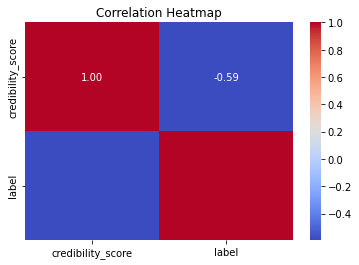

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap: Visualizing correlation between numeric features
print(news_data[['label', 'domain']])
# Plot a heatmap for correlation
correlation = news_data[['credibility_score', 'label']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#Indicates a moderate negative relationship. 
#as the credibility_score decreases,  the probability of a news item being labeled as "fake" increases

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF on the 'title' column
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_text = tfidf_vectorizer.fit_transform(news_data['title'].fillna(''))

# Combine features: text TF-IDF, tweet count, and credibility score
import numpy as np

# Get the tweet count and credibility score as arrays

#X_tweet_count = news_data['tweet_count'].values.reshape(-1, 1)
X_credibility = news_data['credibility_score'].values.reshape(-1, 1)

# Combine all features into one matrix
X = np.hstack((X_text.toarray(),  X_credibility)) #X_tweet_count,
y = news_data['label'].values

# Check the shape of the feature matrix
print("Feature matrix shape:", X.shape)

Feature matrix shape: (23423, 1001)


In [7]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (18738, 1001)
Testing set size: (4685, 1001)


In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.8890074706510138
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3521
           1       0.80      0.73      0.77      1164

    accuracy                           0.89      4685
   macro avg       0.86      0.84      0.85      4685
weighted avg       0.89      0.89      0.89      4685



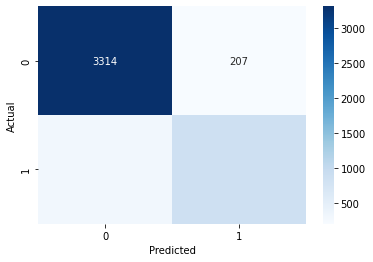

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = clf_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8866595517609391
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3521
           1       0.82      0.70      0.75      1164

    accuracy                           0.89      4685
   macro avg       0.86      0.82      0.84      4685
weighted avg       0.88      0.89      0.88      4685



In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train a Logistic Regression model
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_lr.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = clf_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8890074706510138
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3521
           1       0.80      0.73      0.77      1164

    accuracy                           0.89      4685
   macro avg       0.86      0.84      0.85      4685
weighted avg       0.89      0.89      0.89      4685



In [12]:
from sklearn.svm import SVC

# Train a Support Vector Machine model
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = clf_svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8860192102454643
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3521
           1       0.80      0.72      0.76      1164

    accuracy                           0.89      4685
   macro avg       0.86      0.83      0.84      4685
weighted avg       0.88      0.89      0.88      4685



In [13]:
from sklearn.neural_network import MLPClassifier

# Train a Neural Network model
clf_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
clf_nn.fit(X_train, y_train)

# Predict and evaluate
y_pred_nn = clf_nn.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))


Neural Network Accuracy: 0.8779082177161153
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3521
           1       0.76      0.75      0.75      1164

    accuracy                           0.88      4685
   macro avg       0.84      0.83      0.84      4685
weighted avg       0.88      0.88      0.88      4685



In [14]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes model
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = clf_nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8704375667022412
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3521
           1       0.88      0.55      0.68      1164

    accuracy                           0.87      4685
   macro avg       0.88      0.76      0.80      4685
weighted avg       0.87      0.87      0.86      4685



In [15]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Train a Passive Aggressive Classifier
clf_pa = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
clf_pa.fit(X_train, y_train)

# Predict and evaluate
y_pred_pa = clf_pa.predict(X_test)
print("Passive Aggressive Classifier Accuracy:", accuracy_score(y_test, y_pred_pa))
print(classification_report(y_test, y_pred_pa))


Passive Aggressive Classifier Accuracy: 0.8740661686232657
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      3521
           1       0.77      0.70      0.73      1164

    accuracy                           0.87      4685
   macro avg       0.84      0.81      0.83      4685
weighted avg       0.87      0.87      0.87      4685



Training and evaluating Random Forest...
Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3521
           1       0.82      0.70      0.75      1164

    accuracy                           0.89      4685
   macro avg       0.86      0.82      0.84      4685
weighted avg       0.88      0.89      0.88      4685

Training and evaluating Logistic Regression...
Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3521
           1       0.80      0.73      0.77      1164

    accuracy                           0.89      4685
   macro avg       0.86      0.84      0.85      4685
weighted avg       0.89      0.89      0.89      4685

Training and evaluating SVM...
Metrics for SVM:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3521
           1       0.80      0.72      0.

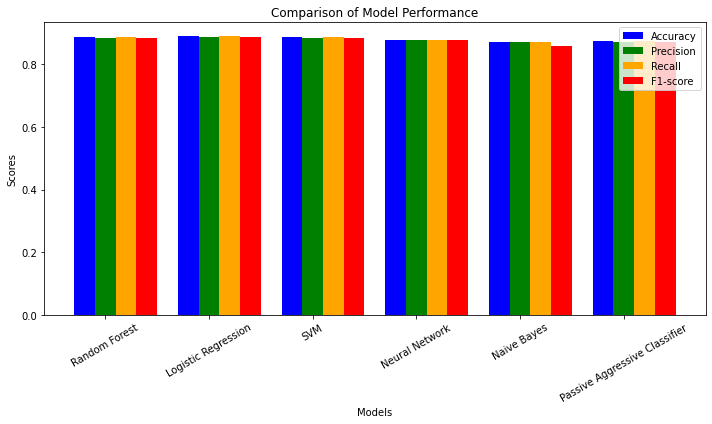

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Passive Aggressive Classifier": PassiveAggressiveClassifier(max_iter=1000, random_state=42)
}

# Initialize metric lists
accuracy = []
precision = []
recall = []
f1_scores = []
model_names = []

# Train, predict, and compute metrics for each model
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    # Train the model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')  # Use 'macro' for unweighted
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Append metrics and model name
    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1_scores.append(f1)
    model_names.append(name)
    # Print classification report
    print(f"Metrics for {name}:\n{classification_report(y_test, y_pred)}")

# Visualization
x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, accuracy, width, label='Accuracy', color='blue')
ax.bar(x, precision, width, label='Precision', color='green')
ax.bar(x + width, recall, width, label='Recall', color='orange')
ax.bar(x + 2 * width, f1_scores, width, label='F1-score', color='red')

# Add labels and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=30)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
